In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./lucas_soil_2018.csv")
df.head()

/var/folders/8t/l4w3q1y96ys6mn_9yk43kpfr0000gn/T/ipykernel_11888/1167546493.py:1: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./lucas_soil_2018.csv")


,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,Lucas2015,Lucas2018,Coarse,Clay,Sand,Silt,PSDAvailable,TextureFromSurvey,USDA,ISSS
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,YES,YES,2.0,23.0,23.0,54.0,Yes,2009.0,silt loam,silty loam
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,YES,YES,6.0,15.0,47.0,38.0,Yes,2009.0,loam,silty loam
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,YES,YES,4.0,23.0,11.0,66.0,Yes,2009.0,silt loam,silty loam
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [5]:
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0_x',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'NUTS_0_y',
       'Lucas2009', 'Lucas2012', 'Lucas2015', 'Lucas2018', 'Coarse', 'Clay',
       'Sand', 'Silt', 'PSDAvailable', 'TextureFromSurvey', 'USDA', 'ISSS'],
      dtype='object')

In [6]:
df.drop(
    columns=["Lucas2009", "Lucas2015", "Lucas2012", "Lucas2012", "Lucas2018"],
    inplace=True,
)
df.drop(columns=["TextureFromSurvey", "PSDAvailable", "NUTS_0_y"], inplace=True)

df.drop(columns=["SURVEY_DATE"], inplace=True)
df["NUTS_0"] = df["NUTS_0_x"]
df.drop(columns=["NUTS_0_x"], inplace=True)
print(df.columns)

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_1',
       'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'Elev', 'LC', 'LU', 'LC0_Desc',
       'LC1_Desc', 'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA',
       'ISSS', 'NUTS_0'],
      dtype='object')


In [7]:
df.replace("< LOD", np.nan, inplace=True)
df.replace("<  LOD", np.nan, inplace=True)
df.replace("<0.0", np.nan, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             18984 non-null  object 
 1   POINTID           18984 non-null  int64  
 2   pH_CaCl2          18983 non-null  float64
 3   pH_H2O            18983 non-null  float64
 4   EC                18975 non-null  float64
 5   OC                18949 non-null  object 
 6   CaCO3             11212 non-null  object 
 7   P                 13981 non-null  object 
 8   N                 18969 non-null  object 
 9   K                 18944 non-null  object 
 10  OC (20-30 cm)     140 non-null    object 
 11  CaCO3 (20-30 cm)  14 non-null     float64
 12  Ox_Al             2510 non-null   float64
 13  Ox_Fe             2510 non-null   float64
 14  NUTS_1            18984 non-null  object 
 15  NUTS_2            18984 non-null  object 
 16  NUTS_3            18984 non-null  object

In [9]:
df["CaCO3"] = df["CaCO3"].astype(float)
df["P"] = df["P"].astype(float)
df["K"] = df["K"].astype(float)
df["N"] = df["N"].astype(float)

In [10]:
df.describe()

,POINTID,pH_CaCl2,pH_H2O,EC,CaCO3,P,N,K,CaCO3 (20-30 cm),Ox_Al,Ox_Fe,TH_LAT,TH_LONG,Elev,Coarse,Clay,Sand,Silt
count,1.898400e+04,18983.000000,18983.000000,18975.000000,11212.000000,13981.000000,18969.000000,18944.000000,14.000000,2510.000000,2510.000000,18984.000000,18984.000000,18984.000000,16275.000000,16728.000000,16728.000000,16728.000000
mean,4.277080e+07,5.706427,6.259460,18.389964,96.213566,34.721172,3.154605,204.456638,288.857143,1.171474,2.547171,48.689184,10.330166,613.188211,15.694869,19.974773,40.965208,39.055655
std,8.350827e+06,1.398586,1.319465,25.560630,164.632163,27.546879,3.716608,207.069427,236.021139,1.243111,2.431786,7.779195,11.192492,1461.681637,12.815397,13.642703,24.887923,17.497355
min,2.652197e+07,2.600000,3.340000,0.240000,1.000000,0.300000,0.200000,6.200000,1.000000,0.000000,0.100000,34.690270,-10.149099,-55.000000,1.000000,0.000000,0.000000,0.000000
25%,3.492293e+07,4.500000,5.120000,8.095000,1.000000,16.600000,1.300000,85.000000,64.500000,0.600000,1.000000,42.229369,-0.745365,124.000000,6.000000,9.000000,20.000000,26.000000
50%,4.466391e+07,5.800000,6.290000,13.950000,5.000000,26.500000,2.000000,153.000000,287.500000,0.900000,1.900000,47.338688,12.078146,261.000000,12.000000,18.000000,39.000000,39.000000
75%,4.992278e+07,7.100000,7.500000,20.600000,123.000000,44.000000,3.400000,261.000000,417.750000,1.300000,3.300000,53.424240,20.647825,666.250000,21.000000,28.000000,60.000000,51.000000
max,6.498167e+07,9.800000,10.430000,1295.600000,926.000000,515.000000,46.500000,7578.800000,702.000000,34.700000,35.800000,69.956515,34.029660,11464.000000,98.000000,95.000000,100.000000,93.000000


In [ ]:
def grab_col_names(data, cat_th=10, car_th=20):
    # Categorical columns and categorical but high-cardinality columns
    cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
    num_but_cat = [col for col in data.columns if data[col].nunique() < cat_th and data[col].dtypes != "O"]
    high_card_cat_cols = [col for col in data.columns if data[col].nunique() > car_th and data[col].dtypes == "O"]

    # Combine Object type columns and Low-unique-value numeric columns into cat_cols
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in high_card_cat_cols]

    # Numerical columns excluding those considered as categorical
    num_cols = [col for col in data.columns if data[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Display information about the dataset
    print(f"Observations: {data.shape[0]}")
    print(f"Variables: {data.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"High Cardinality Categorical Columns: {len(high_card_cat_cols)}")
    print(f"Number but Categorical Columns: {len(num_but_cat)}")
    print("\n")

    return cat_cols, num_cols, high_card_cat_cols


cat_cols, num_cols, high_card_cat_cols = grab_col_names(df)
print(f"Catergorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"High Cardinality Categorical Columns: {high_card_cat_cols}")

Observations: 18984
Variables: 32
Categorical Columns: 4
Numerical Columns: 18
High Cardinality Categorical Columns: 10
Number but Categorical Columns: 0


Catergorical Columns: ['Depth', 'LC0_Desc', 'USDA', 'ISSS']
Numerical Columns: ['POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'TH_LAT', 'TH_LONG', 'Elev', 'Coarse', 'Clay', 'Sand', 'Silt']
High Cardinality Categorical Columns: ['OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc', 'NUTS_0']


In [12]:
print(f"Total number of missing values: {df.isnull().sum().sum()}")

Total number of missing values: 97627


In [13]:
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 0


In [14]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'TH_LAT', 'TH_LONG', 'Coarse', 'Clay', 'Sand', 'Silt']


In [15]:
print(df.isnull().sum())  # Count missing values per column

Depth                   0
POINTID                 0
pH_CaCl2                1
pH_H2O                  1
EC                      9
OC                     35
CaCO3                7772
P                    5003
N                      15
K                      40
OC (20-30 cm)       18844
CaCO3 (20-30 cm)    18970
Ox_Al               16474
Ox_Fe               16474
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
TH_LAT                  0
TH_LONG                 0
Elev                    0
LC                      0
LU                      0
LC0_Desc                0
LC1_Desc                0
LU1_Desc                0
Coarse               2709
Clay                 2256
Sand                 2256
Silt                 2256
USDA                 2256
ISSS                 2256
NUTS_0                  0
dtype: int64


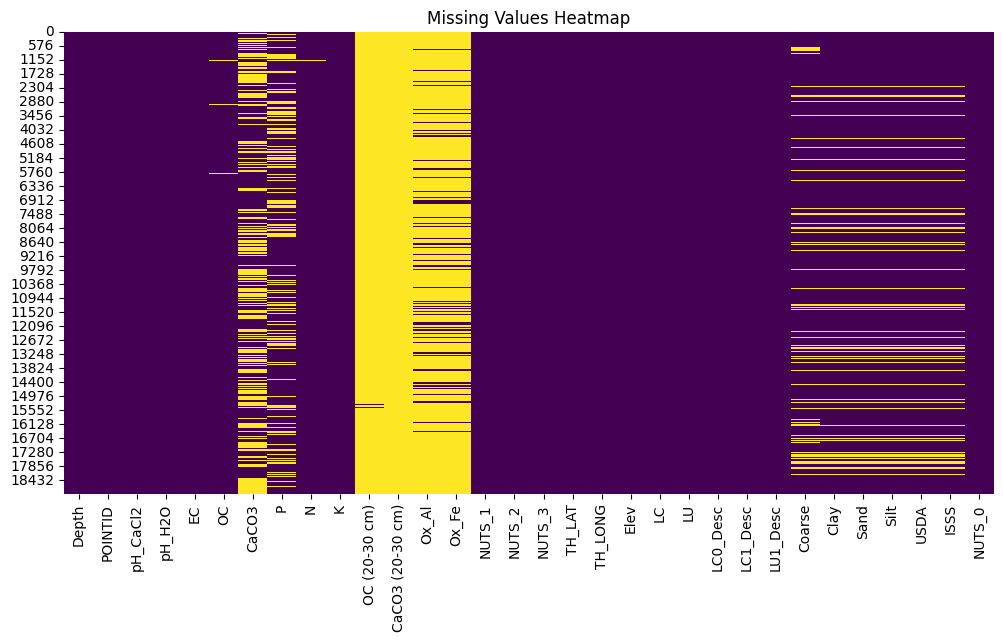

In [16]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
# Missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
CaCO3 (20-30 cm)    99.926254
OC (20-30 cm)       99.262537
Ox_Fe               86.778340
Ox_Al               86.778340
CaCO3               40.939739
P                   26.353772
Coarse              14.269912
USDA                11.883692
Silt                11.883692
Sand                11.883692
Clay                11.883692
ISSS                11.883692
K                    0.210704
OC                   0.184366
N                    0.079014
EC                   0.047408
pH_H2O               0.005268
pH_CaCl2             0.005268
dtype: float64


In [18]:
def drop_missing_columns(df, threshold=0.8):
    """
    Drops columns from a pandas DataFrame if they have more than a specified percentage of missing values.

    Args:
      df: The pandas DataFrame.
      threshold: The threshold percentage of missing values (e.g., 0.8 for 80%).

    Returns:
      A new pandas DataFrame with the columns dropped.
    """
    missing_percentages = df.isnull().sum() / len(df)
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    print(columns_to_drop)
    return df.drop(columns=columns_to_drop)


df = drop_missing_columns(df, 0.8)

Index(['OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe'], dtype='object')


In [19]:
print(f"Remaining columns: {df.columns.tolist()}")


# Fillup missing values
def fill_missing_values(data):
    # Fill missing values for numerical columns with the mean
    numeric_cols = data.select_dtypes(include=["float64"]).columns
    numeric_fill = {col: data[col].mean() for col in numeric_cols}
    data.fillna(numeric_fill, inplace=True)

    # Fill missing values for categorical columns with the mode
    categorical_cols = data.select_dtypes(include=["object"]).columns
    categorical_fill = {col: data[col].mode()[0] for col in categorical_cols}
    data.fillna(categorical_fill, inplace=True)

    return data


df = fill_missing_values(df)
print(df.isnull().sum())  # Count missing values per column


Remaining columns: ['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0']
Depth       0
POINTID     0
pH_CaCl2    0
pH_H2O      0
EC          0
OC          0
CaCO3       0
P           0
N           0
K           0
NUTS_1      0
NUTS_2      0
NUTS_3      0
TH_LAT      0
TH_LONG     0
Elev        0
LC          0
LU          0
LC0_Desc    0
LC1_Desc    0
LU1_Desc    0
Coarse      0
Clay        0
Sand        0
Silt        0
USDA        0
ISSS        0
NUTS_0      0
dtype: int64


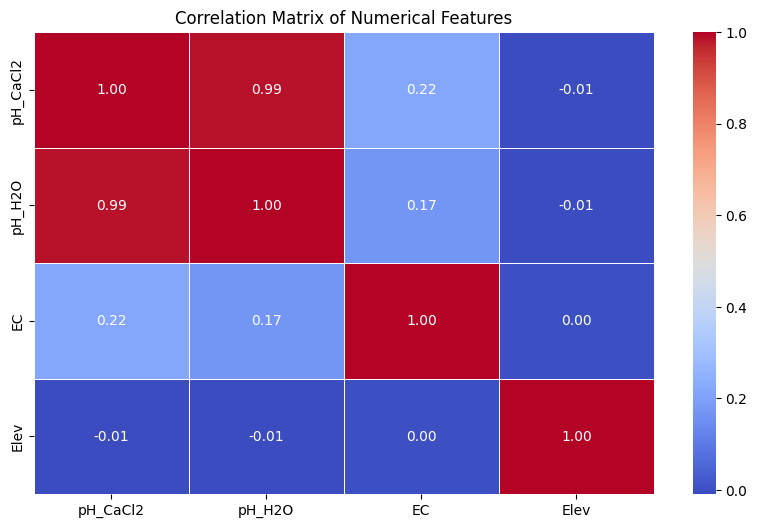

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[["pH_CaCl2", "pH_H2O", "EC", "Elev"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [21]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder


def label_encode(data):
    le = LabelEncoder()
    for col in data.select_dtypes(include=["object"]).columns:
        print(f"Encoding {col}...")
        data[col] = le.fit_transform(data[col])
    return data


df = label_encode(df)
print(df.head())

Encoding Depth...
Encoding OC...
Encoding NUTS_1...
Encoding NUTS_2...
Encoding NUTS_3...
Encoding LC...
Encoding LU...
Encoding LC0_Desc...
Encoding LC1_Desc...
Encoding LU1_Desc...
Encoding USDA...
Encoding ISSS...
Encoding NUTS_0...
   Depth   POINTID  pH_CaCl2  pH_H2O     EC    OC  CaCO3          P    N  \
0      1  47862690       4.1    4.81   8.73   186    3.0  34.721172  1.1   
1      1  47882704       4.1    4.93   5.06   455    1.0  34.721172  1.3   
2      1  47982688       4.1    4.85  12.53  1533    1.0  12.300000  3.1   
3      1  48022702       5.5    5.80  21.10   932    3.0  34.721172  2.0   
4      1  48062708       6.1    6.48  10.89   605    2.0  34.721172  2.2   

       K  ...  LC0_Desc  LC1_Desc  LU1_Desc     Coarse       Clay       Sand  \
0  101.9  ...         7        32        12   2.000000  23.000000  23.000000   
1   51.2  ...         7        55        12   6.000000  15.000000  47.000000   
2  114.8  ...         7        36        12   4.000000  23.000000  

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop(columns=["pH_H2O", "pH_CaCl2"])
y = df["pH_H2O"]
print("Features shape:", X.shape)
print("Target shape:", y.shape)
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (18984, 26)
Target shape: (18984,)
X_train shape: (15187, 26)
X_test shape: (3797, 26)
y_train shape: (15187,)
y_test shape: (3797,)


In [23]:
# Model training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
}
# Initialize a dictionary to store the results
results = {}
# Iterate through the models
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(
        [
            (
                "preprocessor",
                ColumnTransformer(
                    transformers=[
                        (
                            "num",
                            StandardScaler(),
                            X.select_dtypes(include=["float64"]).columns,
                        ),
                        (
                            "cat",
                            "passthrough",
                            X.select_dtypes(include=["int64"]).columns,
                        ),
                    ]
                ),
            ),
            ("model", model),
        ]
    )

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {"MSE": mse, "R2": r2}

Model Performance:
Linear Regression: MSE = 0.6788, R2 = 0.6184
Random Forest: MSE = 0.2325, R2 = 0.8693
Support Vector Regression: MSE = 1.5830, R2 = 0.1102
Decision Tree: MSE = 0.4521, R2 = 0.7459
K-Nearest Neighbors: MSE = 1.2886, R2 = 0.2757


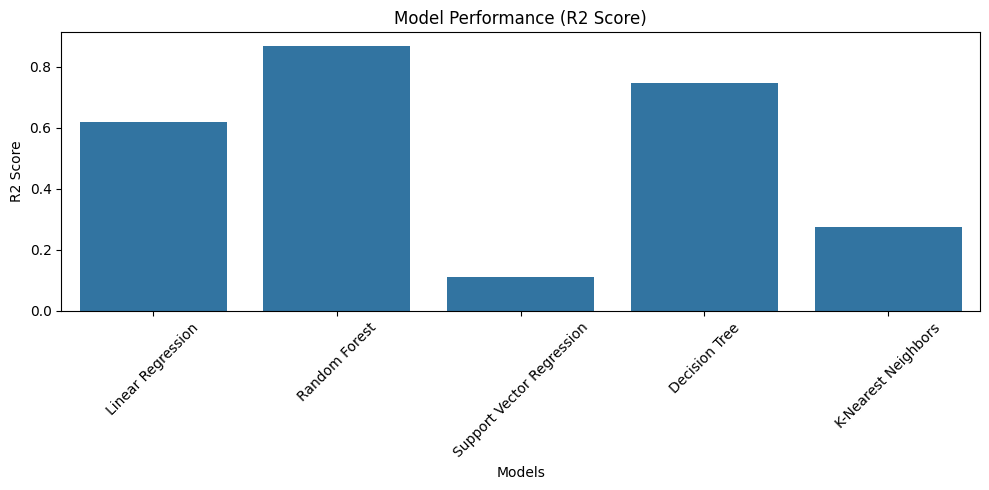

In [24]:
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")
# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(results.keys()),
    y=[metrics["R2"] for metrics in results.values()],
)
plt.title("Model Performance (R2 Score)")
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()